In [80]:

# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
#veamos cuantas dimensiones y registros contiene
url = "https://raw.githubusercontent.com/DuvanSGF/Coronavirus-Data_Science_Fundamentals/master/Datasets/nombrecov.csv"
data = pd.read_csv(url)
data.shape

(28, 2)

In [82]:
#son 26 registros con 2 columnas. Veamos los primeros registros
data.head()

,dia,contagiados
0,1,1
1,2,2
2,3,6
3,4,4
4,5,3


In [83]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,dia,contagiados
count,28.000000,28.000000
mean,14.535714,53.214286
std,8.288690,45.061569
min,1.000000,1.000000
25%,7.750000,16.500000
50%,14.500000,41.000000
75%,21.250000,92.500000
max,29.000000,159.000000


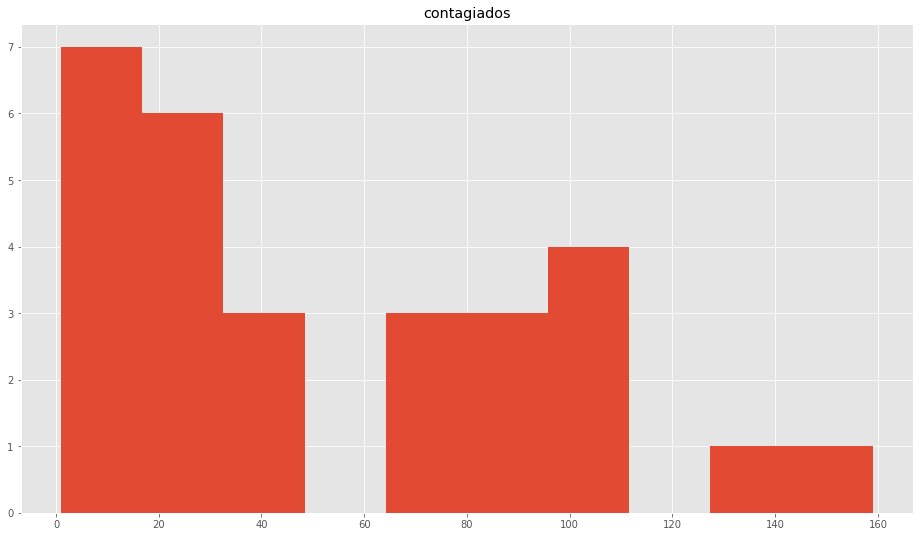

In [87]:

# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['dia'],1).hist()
plt.show()


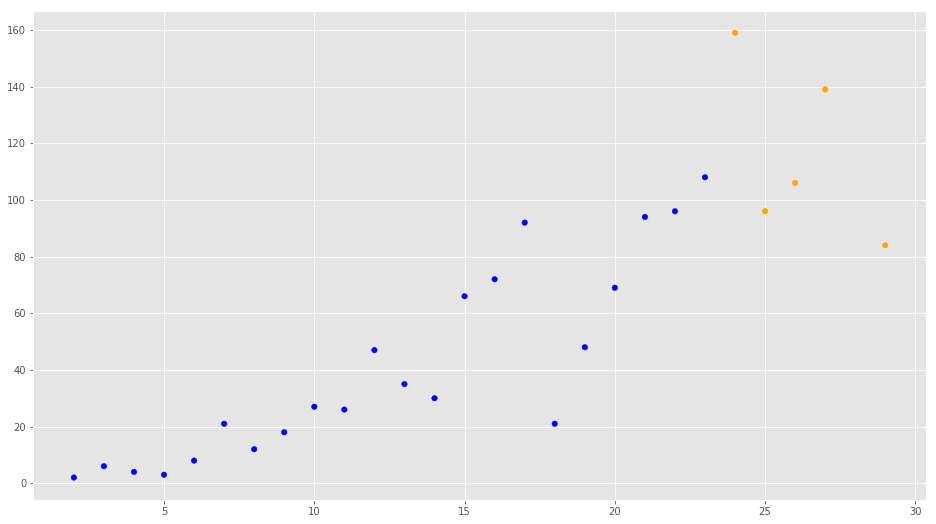

In [100]:

# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
 
 
filtered_data = data[(data['dia'] > 1 ) & (data['contagiados'] <= 8000)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['dia'].values
f2 = filtered_data['contagiados'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['dia']>23):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [101]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["dia"]]
X_train = np.array(dataX)
y_train = filtered_data['contagiados'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [4.93575655]
Independent term: 
 -19.07100591715976
Mean squared error: 423.56
Variance score: 0.78


In [ ]:
#De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente 4.9 y 
#el término independiente «b» es -19.07. Tenemos un Error Cuadrático grande 423.56
#por lo que en realidad este modelo no será muy bueno 😉 Pero estamos aprendiendo 
#a usarlo, que es lo que nos importa ahora 🙂 Esto también se ve reflejado en el 
#puntaje de Varianza que debería ser cercano a 1.0

In [107]:
# Quiero predecir cuántos "contagiados" voy a obtener por el covid,
# según nuestro modelo, hacemos:
y_contagios = regr.predict([[34]])
print(int(y_contagios))

148
